## Dragon ral estate problem

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
1,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
2,0.62739,0.0,8.14,0,0.538,NaN,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
3,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
4,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,17.5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     493 non-null    float64
 1   ZN       493 non-null    float64
 2   INDUS    493 non-null    float64
 3   CHAS     493 non-null    int64  
 4   NOX      493 non-null    float64
 5   RM       488 non-null    float64
 6   AGE      493 non-null    float64
 7   DIS      493 non-null    float64
 8   RAD      493 non-null    int64  
 9   TAX      493 non-null    int64  
 10  PTRATIO  493 non-null    float64
 11  B        493 non-null    float64
 12  LSTAT    493 non-null    float64
 13  MEDV     493 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 54.1 KB


In [3]:
df.size

6902

In [4]:
df.shape

(493, 14)

In [5]:
df.describe()# 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,493.000000,493.000000,493.000000,493.000000,493.000000,488.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,3.706289,11.449290,11.272069,0.070994,0.556101,6.284211,68.499391,3.744161,9.701826,411.653144,18.509331,355.697809,12.662840,22.478702
std,8.695156,23.598338,6.886442,0.257076,0.116960,0.709138,28.347100,2.106737,8.766989,169.291600,2.152856,92.290142,7.124376,9.248121
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082650,0.000000,5.190000,0.000000,0.448000,5.883000,43.700000,2.078800,4.000000,280.000000,17.400000,374.710000,7.120000,16.800000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.099300,5.000000,335.000000,19.100000,391.270000,11.340000,21.100000
75%,3.774980,12.500000,18.100000,0.000000,0.631000,6.626000,94.100000,5.100400,24.000000,666.000000,20.200000,396.210000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df["CHAS"].value_counts()

CHAS
0    458
1     35
Name: count, dtype: int64

In [7]:
%matplotlib inline

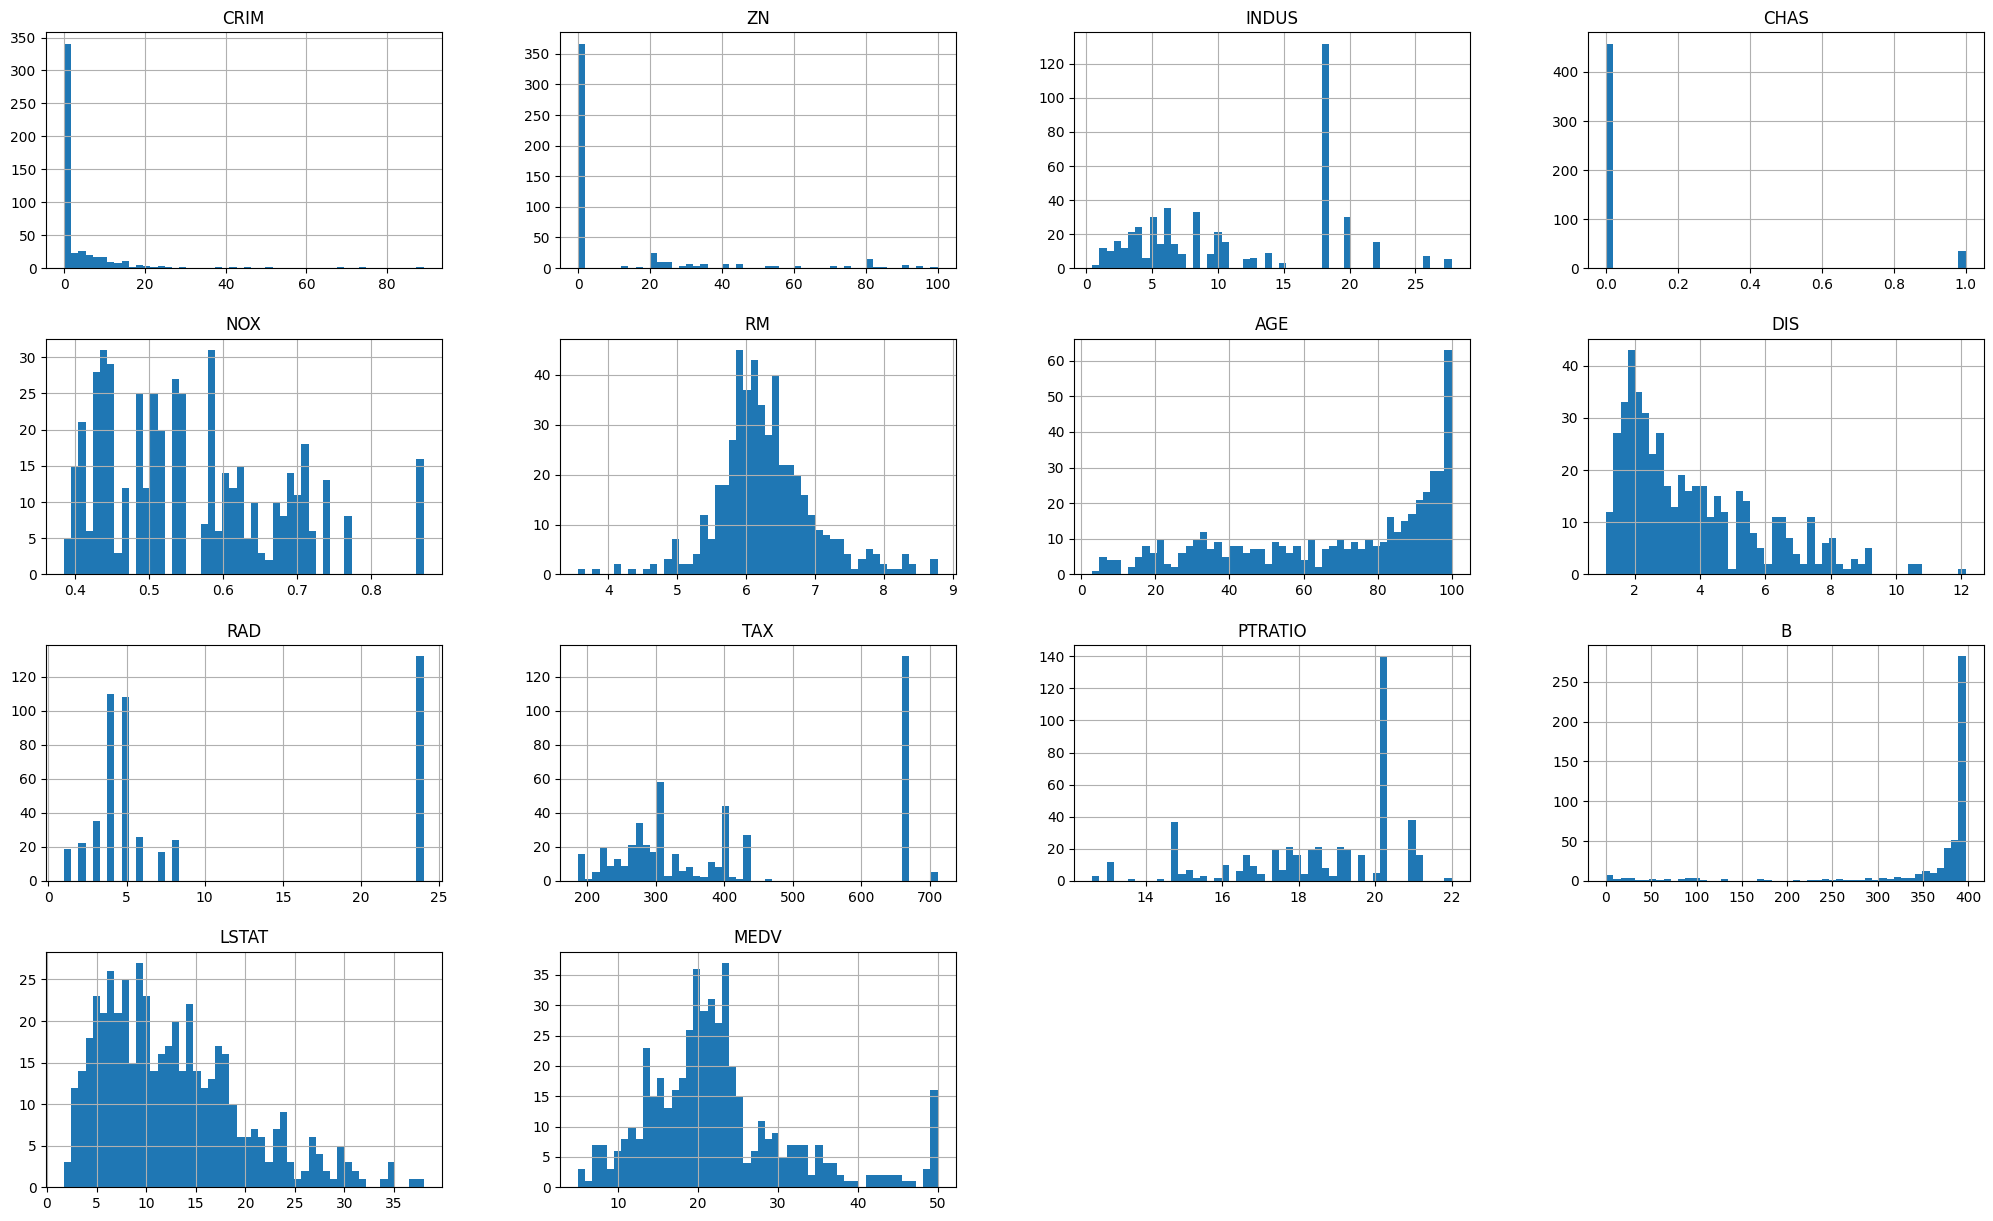

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(25,15))
plt.show()

## Train-test splitting data

In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    print(shuffle)
    test_set_size=int(len(data)*test_ratio)
    train_set_size=len(data)-test_set_size
    test_set_indices=shuffle[:test_set_size]
    train_set_indices=shuffle[test_set_size:]
    return data.iloc[test_set_indices],data.iloc[train_set_indices]
test_set,train_set=split_train_test(df,0.2)
print(len(test_set),len(train_set))

    #The above function already exists in sklearn.models 

[454  73 310 175 332 204 155  55 320   9 104 199 250 192 101 289 448  30
 137 483 429 287 487  72  63  93 391 476  77  68 436  76 140   2 329  79
 208 182 460 312 195 433  33 314   0  11 480 173  84 225 422 324 386 117
  18 399 411 488 244 272 383  39 444 268 463 153 347  70 274 247 484 132
  90  69 486 245 231  78  82 234 318 478 131 440 381 124 425 424 126 266
 342  86  75 431  15 403 380  19 442 437  56 351 222 362 457 317 418 477
  25 228 180 392 154  42 353 491 275 472 277 220 412 405 321  22 323  46
  31 113 331 298 301  57 265  24  17 172  66 404 409  94 148 465  23 357
 408 193   5 116  45  16 455 352   3 211 340  60 110 432 368  29 356 185
  26   7 446 108  37 157 461 118 114 181 176 144 364 374 410 209 210 438
 141 360  67 203 168 370 420 262 109 430 145  92 152 395 278  83 238 165
 253 229  74 305 376 464 119 414 296 248 349 394 218 249 227 377 271  36
 196 139 417 237 307 316  59 111 255 261   6 355 341 334 158 150 177 388
 184 280  10 375 103  81  38 311 167 462 467 290 19

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_test_set=df.loc[test_index]
    strat_train_set=df.loc[train_index]



In [11]:
strat_test_set['CHAS'].value_counts()

CHAS
0    92
1     7
Name: count, dtype: int64

In [12]:
92/7


13.142857142857142

In [13]:
strat_train_set['CHAS'].value_counts()

CHAS
0    366
1     28
Name: count, dtype: int64

In [14]:
366/28

13.071428571428571

In [15]:
df=strat_train_set.copy()

## Looking for correlations


In [16]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677838
ZN         0.380062
B          0.341030
DIS        0.246102
CHAS       0.171493
AGE       -0.344026
CRIM      -0.376244
RAD       -0.378787
NOX       -0.408277
TAX       -0.446904
INDUS     -0.458215
PTRATIO   -0.532502
LSTAT     -0.739733
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

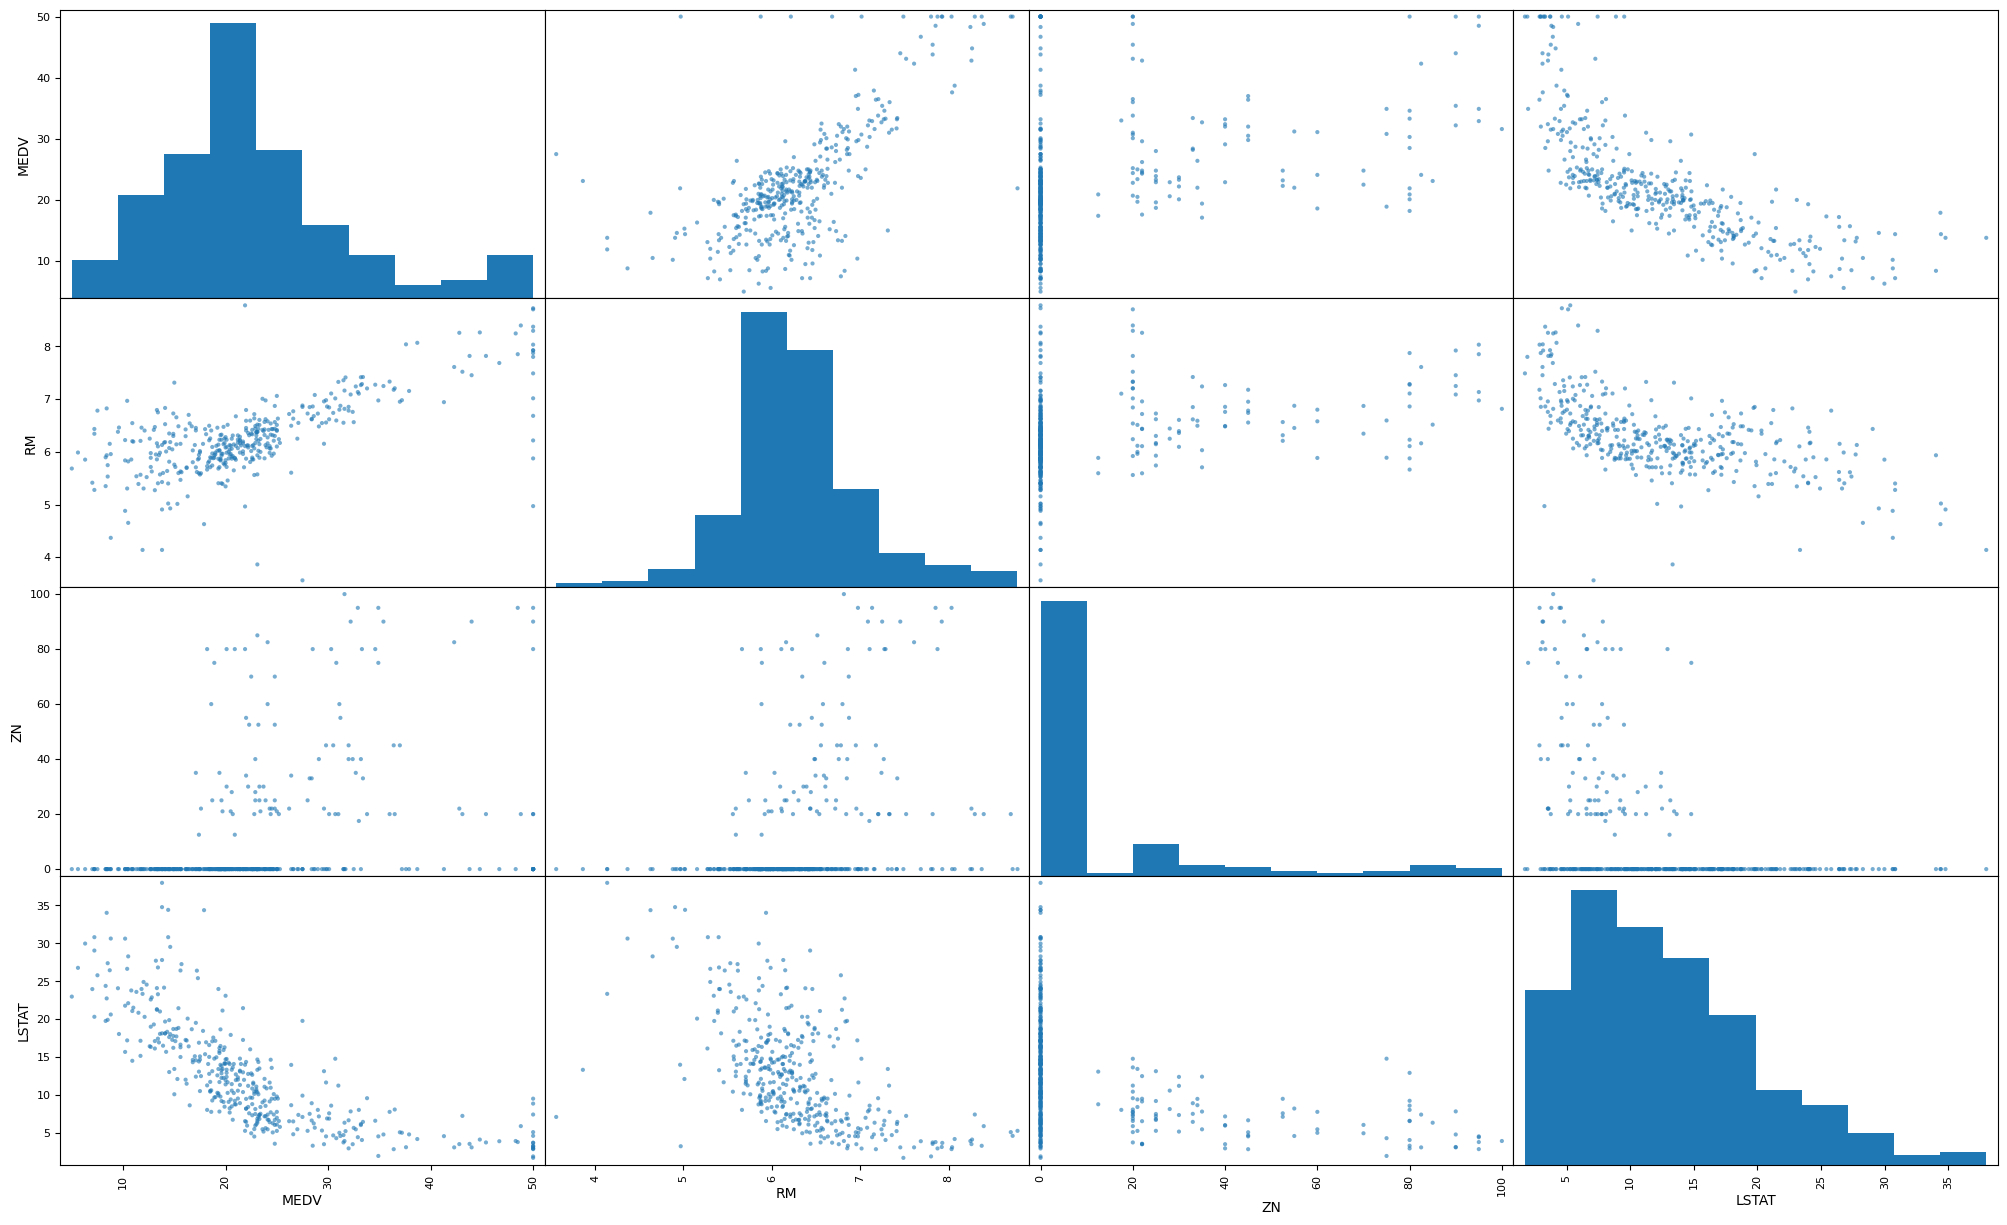

In [17]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(df[attributes],figsize=(25,15),alpha=0.6)

<Axes: xlabel='RM', ylabel='MEDV'>

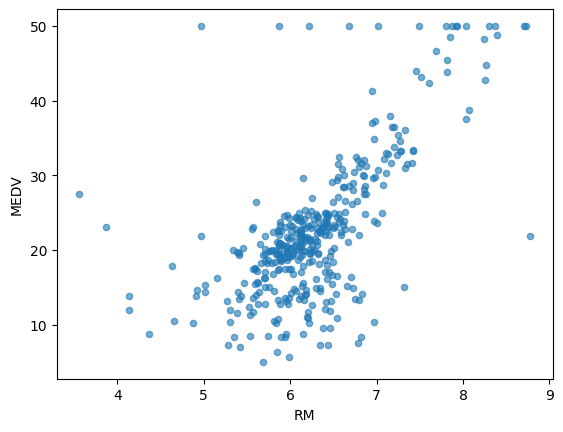

In [18]:
df.plot(kind="scatter",x="RM",y='MEDV',alpha=0.6)

## Attribute combinations

In [19]:
df['TAXRM']=df['TAX']/df['RM']
corrmatrix=df.corr()
corrmatrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.677838
ZN         0.380062
B          0.341030
DIS        0.246102
CHAS       0.171493
AGE       -0.344026
CRIM      -0.376244
RAD       -0.378787
NOX       -0.408277
TAX       -0.446904
INDUS     -0.458215
TAXRM     -0.514882
PTRATIO   -0.532502
LSTAT     -0.739733
Name: MEDV, dtype: float64

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
160,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6,46.134663
199,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277,18.6,390.94,16.03,22.4,47.701050
277,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33,28.5,35.709080
184,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3,46.292388
441,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9,98.989298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.13554,12.5,6.07,0,0.409,5.594,36.8,6.4980,4,345,18.9,396.90,13.09,17.4,61.673221
238,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59,24.8,51.258155
447,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4,99.388151
239,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6,47.434239


<Axes: xlabel='TAXRM', ylabel='MEDV'>

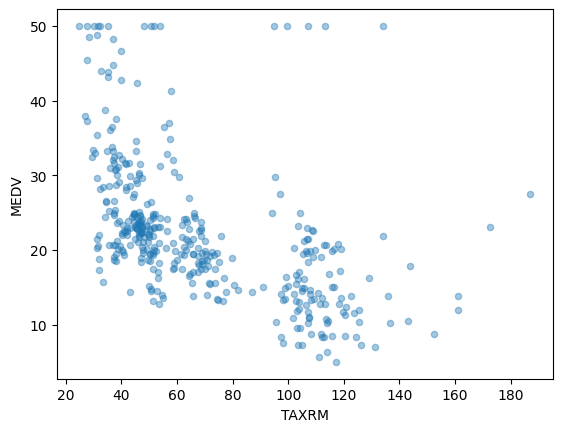

In [21]:
df.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.4)

In [22]:
house_features=strat_train_set.drop('MEDV',axis=1)
house_labels=strat_train_set['MEDV'].copy()

## Missing variables


In [23]:
house_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
#five missing values in housing['RM']
#option1 drop the rows containing missing values
#option2 drop the columns containing na values
#option3 fill the na values with median,0 or mean


In [25]:
#option1
a=df.dropna(subset="RM")# alternate way is df.dropna[subset='RM']
a.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,3.874666,10.707692,11.522051,0.071795,0.560667,6.288385,69.420513,3.641703,9.910256,416.548718,18.470513,351.960821,12.643128,22.478205,68.087787
std,9.044882,23.072685,6.978157,0.258480,0.118102,0.717068,28.190133,2.056299,8.897280,169.681757,2.205666,98.214135,7.049975,9.478742,31.725937
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000,24.990534
25%,0.085013,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.003150,4.000000,284.000000,17.400000,373.852500,7.152500,16.550000,44.627834
50%,0.330960,0.000000,9.900000,0.000000,0.538000,6.208500,78.950000,3.010650,5.000000,351.500000,19.100000,391.065000,11.430000,21.000000,55.281948
75%,4.326920,0.000000,18.100000,0.000000,0.647000,6.594500,94.575000,4.721100,24.000000,666.000000,20.200000,396.042500,16.837500,24.950000,99.588920
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [26]:
a=df.drop("RM",axis=1)# deleting the attribute itself option2
a.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
160,0.09178,0.0,4.05,0,0.510,84.1,2.6463,5,296,16.6,395.50,9.04,23.6,46.134663
199,0.21719,0.0,10.59,1,0.489,53.8,3.6526,4,277,18.6,390.94,16.03,22.4,47.701050
277,0.03502,80.0,4.95,0,0.411,27.9,5.1167,4,245,19.2,396.90,3.33,28.5,35.709080
184,0.04666,80.0,1.52,0,0.404,36.6,7.3090,2,329,12.6,354.31,8.61,30.3,46.292388
441,9.51363,0.0,18.10,0,0.713,94.1,2.4961,24,666,20.2,6.68,18.71,14.9,98.989298


In [27]:
median=df['RM'].median()
df['RM']=df['RM'].fillna(median)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,390.000000
mean,3.839469,10.789340,11.471421,0.071066,0.559929,6.287574,69.295431,3.656475,9.845178,415.109137,18.481472,352.404036,12.623782,22.477919,68.087787
std,9.005509,23.201656,6.963892,0.257262,0.117836,0.713454,28.213652,2.052204,8.875382,169.447540,2.201997,97.811288,7.042425,9.459709,31.725937
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000,24.990534
25%,0.085013,0.000000,5.190000,0.000000,0.449000,5.887250,45.925000,2.005175,4.000000,281.750000,17.400000,374.462500,7.152500,16.550000,44.627834
50%,0.330960,0.000000,9.900000,0.000000,0.538000,6.208500,78.500000,3.057250,5.000000,348.000000,19.100000,391.250000,11.430000,21.000000,55.281948
75%,4.251580,0.000000,18.100000,0.000000,0.643000,6.592250,94.475000,4.770675,24.000000,666.000000,20.200000,396.042500,16.635000,24.950000,99.588920
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [28]:
df.describe()#before imputing missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,390.000000
mean,3.839469,10.789340,11.471421,0.071066,0.559929,6.287574,69.295431,3.656475,9.845178,415.109137,18.481472,352.404036,12.623782,22.477919,68.087787
std,9.005509,23.201656,6.963892,0.257262,0.117836,0.713454,28.213652,2.052204,8.875382,169.447540,2.201997,97.811288,7.042425,9.459709,31.725937
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000,24.990534
25%,0.085013,0.000000,5.190000,0.000000,0.449000,5.887250,45.925000,2.005175,4.000000,281.750000,17.400000,374.462500,7.152500,16.550000,44.627834
50%,0.330960,0.000000,9.900000,0.000000,0.538000,6.208500,78.500000,3.057250,5.000000,348.000000,19.100000,391.250000,11.430000,21.000000,55.281948
75%,4.251580,0.000000,18.100000,0.000000,0.643000,6.592250,94.475000,4.770675,24.000000,666.000000,20.200000,396.042500,16.635000,24.950000,99.588920
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [29]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing=house_features.copy()
imputer.fit(housing)


SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([3.30960e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20850e+00, 7.85000e+01, 3.05725e+00, 5.00000e+00, 3.48000e+02,
       1.91000e+01, 3.91250e+02, 1.14300e+01])

In [31]:
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x,columns=housing.columns)
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.839469,10.789340,11.471421,0.071066,0.559929,6.287574,69.295431,3.656475,9.845178,415.109137,18.481472,352.404036,12.623782
std,9.005509,23.201656,6.963892,0.257262,0.117836,0.713454,28.213652,2.052204,8.875382,169.447540,2.201997,97.811288,7.042425
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.085013,0.000000,5.190000,0.000000,0.449000,5.887250,45.925000,2.005175,4.000000,281.750000,17.400000,374.462500,7.152500
50%,0.330960,0.000000,9.900000,0.000000,0.538000,6.208500,78.500000,3.057250,5.000000,348.000000,19.100000,391.250000,11.430000
75%,4.251580,0.000000,18.100000,0.000000,0.643000,6.592250,94.475000,4.770675,24.000000,666.000000,20.200000,396.042500,16.635000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit Learn Design


1.estimator;
    estimates the attribute values ex  imputer,it has a fit function and tranformer function
    fit function:estimates the values and fits into the datset
2.tranformer:Tranformer function :takes the  input and return the output from the fit function,also has a fit_tranform() 
    function  which fits and then transforms from the fit 
3.predictor:linear regression is best example of predictor. fit and predict are two basic functions.it also has a 
    score functions to evaluate predictions


## Feature scaling

1. Max-min scaling:It scales the attributes values to value-min/(max-min) we already have a function in sklearn.preprocessing by 
                  the name callled minmaxscaler
2. Standard scler:It scales the attribute values to value-mean/std we already have a function cleed standardscaler
                 in sklearn.preprocessing
    

# Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Selecting a desired model for prediction


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
model=DecisionTreeRegressor()
model=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      ("scaler",StandardScaler()),("model",RandomForestRegressor())])

model.fit(housing_tr.values,house_labels.values)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [34]:
some_data=housing_tr.iloc[:5,:]
some_labels=house_labels.iloc[:5]
predict_labels=model.predict(some_data.values)
predict_labels

array([23.206, 21.449, 29.158, 31.562, 14.378])

In [35]:
print(list(some_labels.values))

[23.6, 22.4, 28.5, 30.3, 14.9]


## evaluating the predictions

In [36]:
from sklearn.metrics import mean_squared_error,get_scorer_names
#names=get_scorer_names()
#print(names)
housing_predictions=model.predict(housing_tr.values)

lin_mse=mean_squared_error(housing_predictions,house_labels.values)
lin_rmse=np.sqrt(lin_mse)
lin_mse

1.4703171142131957

## Using a better evaluation technique- Cross Validation technnique


In [37]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_tr.values,house_labels.values,scoring="neg_mean_squared_error")
rmse_scores=np.sqrt(-scores)
rmse_scores


array([2.61970772, 3.16133426, 3.33850606, 4.06631617, 4.62273483])

In [38]:
def print_scores(scores):
    print("RMSE error:",scores)
    print('Mean error:',scores.mean())
    print("Standard deviation:",scores.std())
print_scores(rmse_scores)

RMSE error: [2.61970772 3.16133426 3.33850606 4.06631617 4.62273483]
Mean error: 3.561719808171611
Standard deviation: 0.7039730260814413


## Saving the model

In [39]:
from joblib import dump,load
dump(model,"Dragon1.joblib")
import json
with open("columns.json","w") as f:
    f.write(json.dumps({"data_columns":list(housing_tr.columns)}))


## Testing the model

In [40]:
test_data=strat_test_set.drop('MEDV',axis=1).values
test_label=strat_test_set['MEDV'].values

test_predictions=model.predict(test_data)
mse=mean_squared_error(test_predictions,test_label)
rmse=np.sqrt(mse)
print(rmse)
print(test_predictions)




3.0498214287847665
[14.522 22.737 31.674 40.054 14.29  22.671 14.017  9.747 20.565 16.686
 18.461 10.471 20.094 21.28  10.195 17.886 19.421 45.512 27.287 18.522
 33.311  9.971 20.983 46.658 23.072 14.414 26.908 20.924 45.766 14.336
 20.218 21.691 10.425 18.478 20.724 26.074 18.879 14.177 18.848 20.57
 33.786 14.411 14.835 22.225 20.006 15.11  24.217 20.56  20.631 32.825
 20.274 27.287 24.608 22.909 38.64  31.125 17.936 15.225  8.975 15.043
 19.329 32.086 27.813 20.669 23.867 21.973 27.994 20.511 19.559 20.433
 30.208 25.925 19.825 22.082 19.315 19.488 30.188 24.084 25.188 32.794
 22.009 42.516 11.459 13.371 14.229 32.195 23.62   7.682 15.576 19.204
 20.955 25.05  27.934 24.756 21.17  15.059 23.538 27.788 32.931]


In [41]:
test_label


array([13.1, 25. , 33.1, 35.2, 17.8, 22.2, 13.5,  7. , 22. , 23.7, 23.1,
        8.1, 19.3, 21.7, 13.9, 17.8, 16.6, 43.5, 24.5, 18.3, 36.1, 13.1,
       21.7, 46. , 24.7, 11.8, 23.7, 20.5, 41.7, 17.8, 20.3, 21.1,  9.7,
       20.4, 20.8, 26.5, 17.2, 19.1, 18.8, 21.8, 35.4, 15.2, 16.7, 20.6,
       20.1, 23.2, 24.4, 16.1, 20.3, 33.1, 19.4, 22. , 27.5, 22.3, 39.8,
       35.1, 16.6, 15.6,  7.4, 17.2, 18.5, 27.9, 23.9, 20.6, 22.2, 23.9,
       27.9, 21.1, 18.2, 17.8, 29.1, 23.5, 17.7, 19.1, 22.5, 16. , 30.1,
       23.7, 25. , 37.3, 21.6, 50. , 13.4, 19.1, 13.8, 29. , 28.7,  5. ,
       14.3, 21.5, 11.9, 36.2, 26.7, 25. , 21.2, 12.5, 28.1, 26.6, 34.9])

In [42]:
model.predict([[1.9802e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01,
                        6.1820e+00, 4.2400e+01, 3.9454e+00, 4.0000e+00, 2.7700e+02,
                        1.8600e+01, 3.9363e+02, 9.4700e+00]])

array([22.737])